<a href="https://colab.research.google.com/github/ikwak2/APCP/blob/master/11_min/med02_reg_gdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown --id 1b4w59jB0XWVKfcV_vo9VrQtCB9Kgzp1y

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1b4w59jB0XWVKfcV_vo9VrQtCB9Kgzp1y
To: /content/raw_pea.csv
100% 24.1k/24.1k [00:00<00:00, 23.9MB/s]


In [2]:
!pip3 install git+https://github.com/statsmodels/statsmodels.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/statsmodels/statsmodels.git to /tmp/pip-req-build-my8sentv
  Running command git clone --filter=blob:none --quiet https://github.com/statsmodels/statsmodels.git /tmp/pip-req-build-my8sentv
  Resolved https://github.com/statsmodels/statsmodels.git to commit 50588fc0f9eb0cea29975d7cbfc929add12c8ef0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for statsmodels: filename=statsmodels-0.14.0.dev701+g50588fc0f-cp38-cp38-linux_x86_64.whl size=19696772 sha256=345140ada9f38647cd7c428226755dda490db329346efbcd81921c44026c83e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-zgv3xtkq/wheels/ff/9d/8b/25017c3788fad916fdf1c1e49baed1b228c539e84909f38b5e
Successfully built statsmodels
  Attempting uninstall: statsmodels
    Found e

In [3]:
## import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr

from statsmodels.miscmodels.ordinal_model import OrderedModel
#from statsmodels.discrete.discrete_model import OrderedModel
from pandas.api.types import CategoricalDtype

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

**| Data Preprocessing**

In [4]:
# upload dataset
pea = pd.read_csv('raw_pea.csv', sep=',', encoding='cp949')
pea.head()

,환자번호,이름,나이,성별,동반 질환,Unnamed: 5,Unnamed: 6,흡연력,Unnamed: 8,코수술 \n과거력,...,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,검사일시
0,NaN,NaN,NaN,NaN,당뇨,고혈압,비고,유무,기간,NaN,...,C,D,D-1,E,F,F-1,G,H,NaN,NaN
1,667976.0,전현구,28.0,M,0,0,NaN,1,4.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1153168.0,오세웅,21.0,M,0,0,NaN,0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1147.0,임기현,73.0,F,0,0,NaN,0,NaN,0.0,...,-,-,NaN,-,-,NaN,-,-,NaN,NaN
4,1566457.0,조대희,40.0,M,0,0,NaN,1,20,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 기존 제목 행이 1,2 두 행이므로 0행 제거
pea.drop(index=0, axis=0, inplace=True)

# 사용 변수 이외 열 제거
pea = pea[['나이', '성별', '동반 질환', 'Unnamed: 5', '흡연력', '미각 저하여부', 
           'PEA bead system', 'KVSS_\nthreshold', 'KVSS_\ndiscrimination',
           'KVSS_\nIdentificatoin', 'KVSS_\nTDI', '후각 정도']]
# 열 이름 변경
pea.columns = ['age', 'sex', 'diabetes', 'hypertension', 'smoking', 'palate',
               'PEA', 'threshold', 'discrimination', 'identification', 'TDI', 'olfactory']

pea

,age,sex,diabetes,hypertension,smoking,palate,PEA,threshold,discrimination,identification,TDI,olfactory
1,28.0,M,0,0,1,0.0,4.0,4.0,8.0,11.0,23.0,3.0
2,21.0,M,0,0,0,0.0,5.0,4.0,8.0,12.0,24.0,3.0
3,73.0,F,0,0,0,0.0,3.0,4.0,10.0,12.0,26.0,3.0
4,40.0,M,0,0,1,0.0,2.0,5.5,8.0,11.0,24.5,3.0
5,71.0,M,0,0,0,1.0,6.0,4.0,8.0,9.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136,45.0,M,0,1,1,0.0,7.0,7.0,6.0,11.0,24.0,3.0
137,35.0,M,0,0,0,1.0,0.0,0.0,6.0,4.0,10.0,1.0
138,54.0,M,0,0,0,1.0,0.0,0.0,2.0,2.0,4.0,1.0
139,50.0,F,0,0,0,0.0,1.0,6.0,8.0,11.0,25.0,3.0


In [6]:
# 결측치 확인
pea.isnull().sum().to_frame('null')

,null
age,1
sex,1
diabetes,1
hypertension,0
smoking,2
palate,1
PEA,1
threshold,1
discrimination,1
identification,1


In [7]:
pea.loc[pea['smoking'].isna()]

,age,sex,diabetes,hypertension,smoking,palate,PEA,threshold,discrimination,identification,TDI,olfactory
125,63.0,M,1,0,NaN,0.0,3.0,5.0,6.0,12.0,23.0,3.0
140,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# 결측치 처리
pea.drop(index=140, axis=0, inplace=True) # 환자 데이터 아니므로 행 제거
pea['smoking']= pea['smoking'].fillna(2) # nan 값 기타(2) 항목으로 대체
pea

,age,sex,diabetes,hypertension,smoking,palate,PEA,threshold,discrimination,identification,TDI,olfactory
1,28.0,M,0,0,1,0.0,4.0,4.0,8.0,11.0,23.0,3.0
2,21.0,M,0,0,0,0.0,5.0,4.0,8.0,12.0,24.0,3.0
3,73.0,F,0,0,0,0.0,3.0,4.0,10.0,12.0,26.0,3.0
4,40.0,M,0,0,1,0.0,2.0,5.5,8.0,11.0,24.5,3.0
5,71.0,M,0,0,0,1.0,6.0,4.0,8.0,9.0,21.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
135,64.0,M,0,0,0,0.0,7.0,8.0,6.0,12.0,26.0,3.0
136,45.0,M,0,1,1,0.0,7.0,7.0,6.0,11.0,24.0,3.0
137,35.0,M,0,0,0,1.0,0.0,0.0,6.0,4.0,10.0,1.0
138,54.0,M,0,0,0,1.0,0.0,0.0,2.0,2.0,4.0,1.0


In [9]:
# olfactory(최종적인 후각 기능 진단 결과) 카테고리화
cat_type = CategoricalDtype(categories=[1, 2, 3], ordered=True)
pea['olfactory'] = pea['olfactory'].astype(cat_type)
pea['olfactory'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=True)

In [10]:
# sex(성별) 인코딩
pea['sex'] = pea['sex'].apply(lambda x: 1 if x == 'M' else 0)

In [11]:
# object -> float 타입 변경
pea[['diabetes', 'hypertension', 'smoking']]= pea[['diabetes', 'hypertension', 'smoking']].astype('float')

In [12]:
pea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             139 non-null    float64 
 1   sex             139 non-null    int64   
 2   diabetes        139 non-null    float64 
 3   hypertension    139 non-null    float64 
 4   smoking         139 non-null    float64 
 5   palate          139 non-null    float64 
 6   PEA             139 non-null    float64 
 7   threshold       139 non-null    float64 
 8   discrimination  139 non-null    float64 
 9   identification  139 non-null    float64 
 10  TDI             139 non-null    float64 
 11  olfactory       139 non-null    category
dtypes: category(1), float64(10), int64(1)
memory usage: 13.3 KB


In [13]:
pea.to_csv('pea.csv')

In [14]:
pea.columns

Index(['age', 'sex', 'diabetes', 'hypertension', 'smoking', 'palate', 'PEA',
       'threshold', 'discrimination', 'identification', 'TDI', 'olfactory'],
      dtype='object')

**[X 변수 설명]**

1. age : 나이
2. sex : 성별
3. diabetes : 당뇨
4. hypertension : 고혈압
5. smoking : 흡연력
6. palate : 미각 저하여부
7. PEA : PEA detection threshold score
8. threshold : threshold score
9. discrimination : discrimination score
10. identificatoin : identification score
11. TDI : 위 세 가지 score 합


**[Y 변수 설명]**

1. olfactory : 후각 정도

**| Logistic Regression**

In [22]:
X = pea[['age', 'sex', 'diabetes', 'hypertension', 'palate', 'PEA']]
y = pea['olfactory']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

***1-1. Multinomial Logistic Regression***

In [17]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
print('Estimated beta1 : \n', model.coef_)
print('Estimated beta0 : \n', model.intercept_)

Estimated beta1 : 
 [[ 0.00857094  0.3321277  -0.41643885  0.33994848  1.04149479 -1.04696284]
 [ 0.01536682 -0.04620128 -0.15737147 -0.29429949 -0.06485357  0.3040952 ]
 [-0.02393776 -0.28592642  0.57381032 -0.04564899 -0.97664122  0.74286764]]
Estimated beta0 : 
 [ 0.26615792 -1.1247421   0.85858418]


In [18]:
print('학습 결과 : ', model.score(X_train, y_train))
print('검증 결과 : ', model.score(X_test, y_test))

학습 결과 :  0.8076923076923077
검증 결과 :  0.8


In [19]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print('classification_report - 학습데이터\n')
print(classification_report(y_train, pred_train))
print('\n classification_report - 검증데이터\n')
print(classification_report(y_test, pred_test))

classification_report - 학습데이터

              precision    recall  f1-score   support

           1       0.84      0.93      0.88        28
           2       0.75      0.16      0.26        19
           3       0.80      0.96      0.87        57

    accuracy                           0.81       104
   macro avg       0.80      0.68      0.67       104
weighted avg       0.80      0.81      0.76       104


 classification_report - 검증데이터

              precision    recall  f1-score   support

           1       0.78      1.00      0.88         7
           2       0.50      0.14      0.22         7
           3       0.83      0.95      0.89        21

    accuracy                           0.80        35
   macro avg       0.70      0.70      0.66        35
weighted avg       0.76      0.80      0.75        35



In [20]:
print('Confusion Matix : \n', confusion_matrix(y_train, pred_train))

Confusion Matix : 
 [[26  0  2]
 [ 4  3 12]
 [ 1  1 55]]


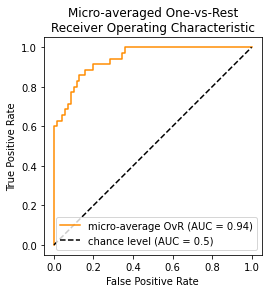

Micro-averaged One-vs-Rest ROC AUC score:
0.94


In [25]:
# ROC AUC score & ROC Curve Plot
y_score = model.predict_proba(X_test)

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

label_binarizer.transform([1]), label_binarizer.transform([2]), label_binarizer.transform([3])

# “1” or “non 1” (the rest).
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

from sklearn.metrics import roc_curve, auc

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

***1-2. OVR Logistic Regression***

In [ ]:
model_ovr = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
print('Estimated beta1 : \n', model_ovr.coef_)
print('Estimated beta0 : \n', model_ovr.intercept_)

Estimated beta1 : 
 [[ 0.01339467  0.44462099 -0.4040321   0.44489673  1.31654678 -1.52116514]
 [ 0.02938196 -0.15494308 -0.41875784 -0.2887827  -0.14515436 -0.04259593]
 [-0.03439068 -0.40322703  0.56430572  0.00644416 -1.32198989  0.774143  ]]
Estimated beta0 : 
 [-0.3440201  -2.67069616  0.63296656]


In [ ]:
print('학습 결과 : ', model_ovr.score(X_train, y_train))
print('검증 결과 : ', model_ovr.score(X_test, y_test))

학습 결과 :  0.7980769230769231
검증 결과 :  0.7714285714285715


In [ ]:
pred_train_ovr = model_ovr.predict(X_train)
pred_test_ovr = model_ovr.predict(X_test)
print('classification_report - 학습데이터')
print(classification_report(y_train, pred_train_ovr))

classification_report - 학습데이터
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        28
           2       1.00      0.11      0.19        19
           3       0.79      0.96      0.87        57

    accuracy                           0.80       104
   macro avg       0.87      0.67      0.64       104
weighted avg       0.83      0.80      0.74       104



In [ ]:
print('classification_report - 검증데이터')
print(classification_report(y_test, pred_test_ovr))

classification_report - 검증데이터
              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       0.00      0.00      0.00         7
           3       0.80      0.95      0.87        21

    accuracy                           0.77        35
   macro avg       0.50      0.65      0.56        35
weighted avg       0.62      0.77      0.69        35



In [ ]:
confusion_matrix(y_train, pred_train_ovr)

array([[26,  0,  2],
       [ 4,  2, 13],
       [ 2,  0, 55]])

***2. Ordinal Regression***

In [35]:
ordinal_model = OrderedModel(pea['olfactory'], 
                             pea[['age', 'sex', 'diabetes', 'hypertension', 'smoking', 'palate', 'PEA']],
                             distr = 'logit').fit()
ordinal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:              olfactory   Log-Likelihood:                -85.214
Model:                   OrderedModel   AIC:                             188.4
Method:            Maximum Likelihood   BIC:                             214.8
Date:                Fri, 13 Jan 2023                                         
Time:                        05:33:36                                         
No. Observations:                 139                                         
Df Residuals:                     130                                         
Df Model:                           7                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
age             -0.0512      0.013     -3.821      0.000      -0.077      -0.025
sex             -0.5273      0.513     -1.028      0.304      -1.532       0.478
diabetes        -0.0203      0.926     -0.022      0.983      -1.835       1.794
hypertension    -0.4013      0.622     -0.645      0.519      -1.621       0.818
smoking          0.5392      0.360      1.497      0.134      -0.167       1.245
palate          -0.5922      0.512     -1.158      0.247      -1.595       0.410
PEA              1.1321      0.168      6.730      0.000       0.802       1.462
1/2             -2.2013      0.782     -2.813      0.005      -3.735      -0.668
2/3              0.6194      0.176      3.515      0.000       0.274       0.965
================================================================================
"""

**[분석 결과]**
1. 유의수준 0.05 하에서 유의한 변수 : age, PEA
2. 유의수준 0.05 하에서 유의하지 않은 변수 : sex, diabetes, hypertension, smoking, palate

    --> 유의하지 않은 변수 제외하여 모형 재설계

In [36]:
predicted = ordinal_model.model.predict(ordinal_model.params, exog=pea[['age', 'sex', 'diabetes', 'hypertension', 'smoking', 'palate', 'PEA']])

In [37]:
pred_choice = predicted.argmax(1)
print('Fraction of correct choice predictions\n :', (np.asarray(pea['olfactory'].values.codes) == pred_choice).mean())

Fraction of correct choice predictions
 : 0.7482014388489209


In [38]:
cnf_matrix = confusion_matrix(np.asarray(pea['olfactory'].values.codes), pred_choice)
cnf_matrix

array([[30,  4,  1],
       [ 6,  6, 14],
       [ 2,  8, 68]])

In [39]:
ret = multilabel_confusion_matrix(np.asarray(pea['olfactory'].values.codes), pred_choice, labels=[0, 1, 2])

tn0, fp0, fn0, tp0 = ret[0].ravel()
tn1, fp1, fn1, tp1 = ret[1].ravel()
tn2, fp2, fn2, tp2 = ret[2].ravel()

sensitivity0 = tp0/(tp0 + fn0) # 민감도 label 1
specificity0 = tn0/(tn0 + fp0) # 특이도 label 1

sensitivity1 = tp1/(tp1 + fn1) # 민감도 label 2
specificity1 = tn1/(tn1 + fp1) # 특이도 label 2

sensitivity2 = tp2/(tp2 + fn2) # 민감도 label 3
specificity2 = tn2/(tn2 + fp2) # 특이도 label 3

#print('label 1 : tn, fp, fn, tp ', tn0, fp0, fn0, tp0 )
#print('label 2 : tn, fp, fn, tp ', tn1, fp1, fn1, tp1 )
#print('label 3 : tn, fp, fn, tp ', tn2, fp2, fn2, tp2 )

print('label 1 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity0, specificity0))
print('label 2 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity1, specificity1))
print('label 3 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity2, specificity2))

label 1 : sensitivity - 0.8571 / specificity - 0.9231
label 2 : sensitivity - 0.2308 / specificity - 0.8938
label 3 : sensitivity - 0.8718 / specificity - 0.7541


In [40]:
print('ROC_AUC_Score \n:',roc_auc_score(pea['olfactory'], predicted, multi_class='ovr'))

ROC_AUC_Score 
: 0.8495285868925793


- 유의하지 않은 변수 제외

In [41]:
ordinal_model2 = OrderedModel(pea['olfactory'], 
                              pea[['age', 'PEA']],
                              distr = 'logit').fit()
ordinal_model2.summary()

Optimization terminated successfully.
         Current function value: 0.640088
         Iterations: 165
         Function evaluations: 284


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:              olfactory   Log-Likelihood:                -88.972
Model:                   OrderedModel   AIC:                             185.9
Method:            Maximum Likelihood   BIC:                             197.7
Date:                Fri, 13 Jan 2023                                         
Time:                        05:34:01                                         
No. Observations:                 139                                         
Df Residuals:                     135                                         
Df Model:                           2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0397      0.012     -3.384      0.001      -0.063      -0.017
PEA            1.1115      0.162      6.867      0.000       0.794       1.429
1/2           -1.2539      0.628     -1.997      0.046      -2.484      -0.024
2/3            0.5028      0.184      2.730      0.006       0.142       0.864
==============================================================================
"""

In [42]:
predicted2 = ordinal_model2.model.predict(ordinal_model2.params, exog=pea[['age', 'PEA']])

In [43]:
pred_choice2 = predicted2.argmax(1)
print('Fraction of correct choice predictions\n:',(np.asarray(pea['olfactory'].values.codes) == pred_choice2).mean())

Fraction of correct choice predictions
: 0.7410071942446043


In [44]:
cnf_matrix2 = confusion_matrix(np.asarray(pea['olfactory'].values.codes), pred_choice2)
cnf_matrix2

array([[32,  2,  1],
       [ 7,  3, 16],
       [ 4,  6, 68]])

In [45]:
ret = multilabel_confusion_matrix(np.asarray(pea['olfactory'].values.codes), pred_choice2, labels=[0, 1, 2])

tn0, fp0, fn0, tp0 = ret[0].ravel()
tn1, fp1, fn1, tp1 = ret[1].ravel()
tn2, fp2, fn2, tp2 = ret[2].ravel()

sensitivity0 = tp0/(tp0 + fn0) # 민감도 label 1
specificity0 = tn0/(tn0 + fp0) # 특이도 label 1

sensitivity1 = tp1/(tp1 + fn1) # 민감도 label 2
specificity1 = tn1/(tn1 + fp1) # 특이도 label 2

sensitivity2 = tp2/(tp2 + fn2) # 민감도 label 3
specificity2 = tn2/(tn2 + fp2) # 특이도 label 3

#print('label 1 : tn, fp, fn, tp ', tn0, fp0, fn0, tp0 )
#print('label 2 : tn, fp, fn, tp ', tn1, fp1, fn1, tp1 )
#print('label 3 : tn, fp, fn, tp ', tn2, fp2, fn2, tp2 )

print('label 1 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity0, specificity0))
print('label 2 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity1, specificity1))
print('label 3 : sensitivity - {:.4f} / specificity - {:.4f}'.format(sensitivity2, specificity2))

label 1 : sensitivity - 0.9143 / specificity - 0.8942
label 2 : sensitivity - 0.1154 / specificity - 0.9292
label 3 : sensitivity - 0.8718 / specificity - 0.7213


In [46]:
print('ROC_AUC_Score\n:',roc_auc_score(pea['olfactory'], predicted2, multi_class='ovr'))

ROC_AUC_Score
: 0.8379604860056044
